In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names1880=pd.read_csv("babynames/yob1880.txt", 
            names=['name', 'sex', 'births'])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
pieces=[] #[1880df, 1881df, ..., 2010df]

for year in range(1880,2011):
    df=pd.read_csv("babynames/yob%d.txt" % year,
               names=['name','sex','births'])
    df['year']=year
    pieces.append(df)

In [6]:
names=pd.concat(pieces, ignore_index=True)

In [8]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [9]:
total_births=names.pivot_table('births',aggfunc=sum, index='year', columns='sex')

<AxesSubplot:title={'center':'Total births'}, xlabel='year'>

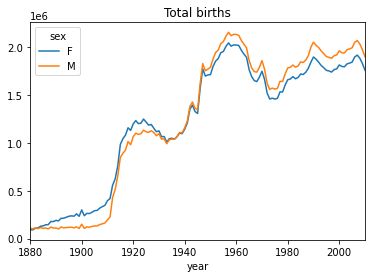

In [10]:
total_births.tail()
total_births.plot(title="Total births")

In [11]:
names #year, sex 그룹화

def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
    #     (1880,F).태어난아이수/(1880,F).태어난아이수.sum()
    #880년에 태어난 여자아이 수/1880년에 태어난 여자아이 수의 전체 합계
    #print("="*50)
names=names.groupby(['year','sex']).apply(add_prop)
#             131 * 2 = 262개 그룹

In [13]:
names
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [14]:
#각 연도별/성별에 따른 선호하는 이름 1000개씩 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
    #ascending=True(오름차순 정렬), 
    #ascending=False(내림차순 정렬)

top1000=names.groupby(['year','sex']).apply(get_top1000)
#연도와 성별에 따른 그룹화 -> 각 그룹에 대해 함수를 적용해라

In [15]:
top1000.reset_index(inplace=True, drop=True)

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [17]:
#이름 유행 분석
top1000['sex'] # top1000.sex

boys=top1000[top1000['sex']=='M']
#불린참조 : 참(True)에 해당되는 자료들만 추출
girls=top1000[top1000['sex']=='F']

In [18]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [19]:
total_births=top1000.pivot_table("births", index='year', 
                   columns='name',
                   aggfunc=sum)

# 예를들어, aaa 라는 이름의 경우에는
# 1880~2010년까지 단 한번도 1000 등 안에 들어가본적이 없다
# 131 rows × 6868 columns
# 131년(1880~2010)
# 6868?1880~2010 각 연도별 인기 있는 이름 상위 1000개씩 추출을 
# 했을때, 중복을 제외한(unique) 이름에 대한 종류의 개수

In [20]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [22]:
total_births['John']

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9427.0
         ...   
2006    15140.0
2007    14405.0
2008    13273.0
2009    12048.0
2010    11424.0
Name: John, Length: 131, dtype: float64